In [33]:
# 모듈 불러오기
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

import plotly.express as px
import plotly.graph_objects as go

import missingno as msno
from wordcloud import WordCloud

# 폰트조절

from matplotlib import font_manager, rc
f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)  

# 데이터 불러오기
data = pd.read_csv('C:/Users/tiamo/OneDrive/바탕 화면/데이터스터디/wellknown/netfilx/data/netflix_titles.csv')



In [2]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data['duration'].unique()


array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [4]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

<AxesSubplot:>

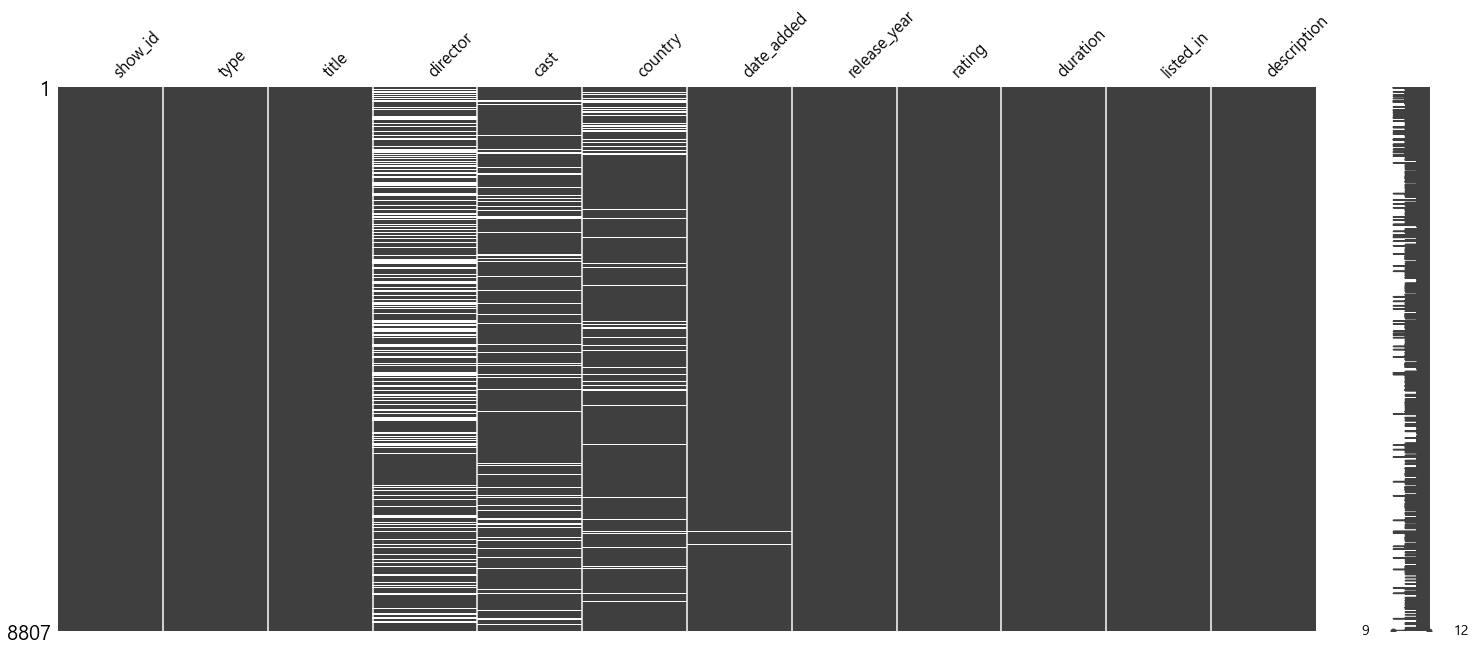

In [11]:
msno.matrix(data)

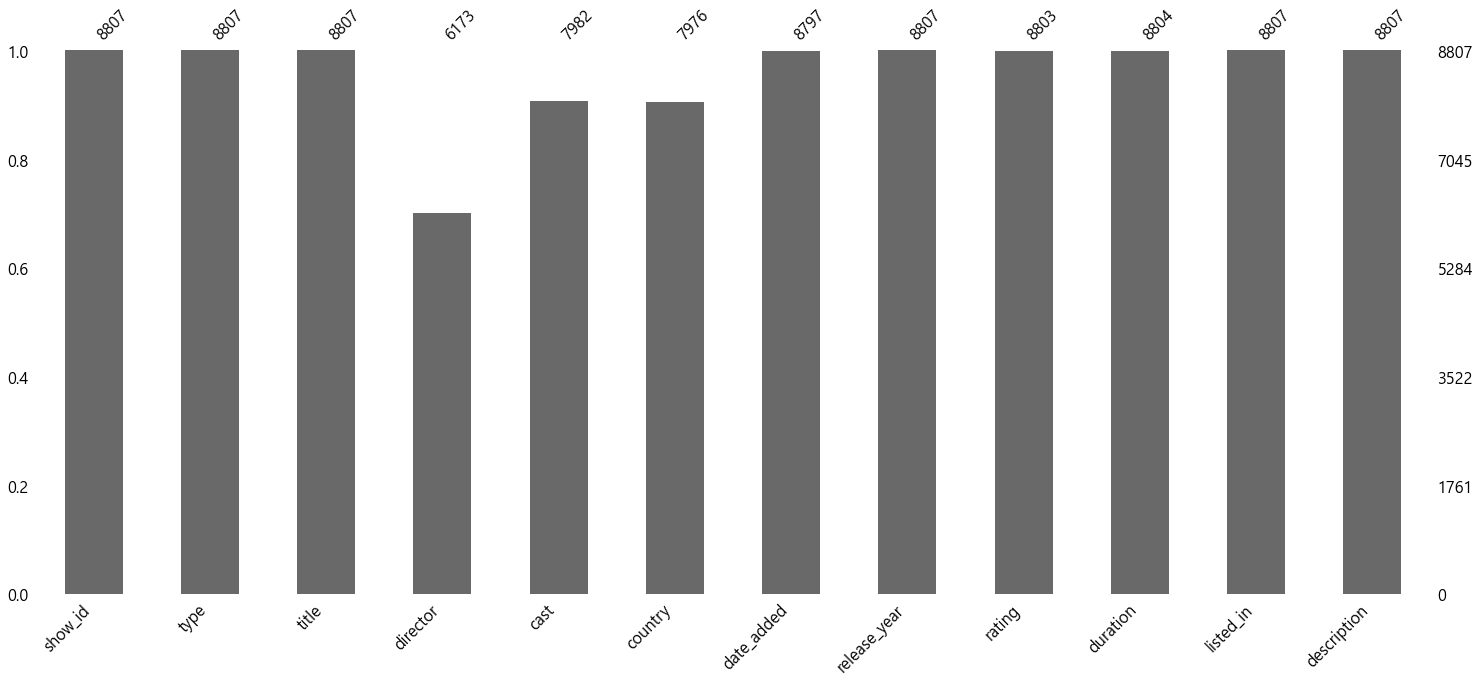

In [12]:
msno.bar(data);

In [13]:
for i in data.columns:
    null_rate = data[i].isna().sum() / len(data) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

director's null rate :29.91%
cast's null rate :9.37%
country's null rate :9.44%
date_added's null rate :0.11%
rating's null rate :0.05%
duration's null rate :0.03%


In [15]:
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

# 전처리

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### 빈데이터 row 삭제

In [16]:

data=data[data["date_added"].notna()]

In [17]:
data.isna().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added         0
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [34]:
data["date_added"]

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [18]:
data['country'] = data['country'].fillna(data['country'].mode()[0])

In [ ]:
# netflix[['director','cast','country']]=netflix[['director','cast','country']].fillna('-',axis=0)

In [ ]:
# 결측치 채우기 

# rating_replacements = {
#     67: 'TV-PG',
#     2359: 'TV-14',
#     3660: 'TV-MA',
#     3736: 'TV-MA',
#     3737: 'NR',
#     3738: 'TV-MA',
#     4323: 'TV-MA '
# }

# for id, rate in rating_replacements.items():
#     main_df.iloc[id, 8] = rate
    
# main_df['rating'].isna().sum()

In [7]:
data['date_added'].head()

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object

In [40]:
data['date_added'] = pd.to_datetime(data['date_added'])

# 시각화

## 시청 연령


In [23]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

data['target_ages'] = data['rating'].replace(ratings_ages)
data['target_ages'].unique()





array(['Teens', 'Adults', 'Older Kids', 'Kids', '74 min', '84 min',
       '66 min', nan], dtype=object)

In [24]:
def generate_rating_df(data):
    rating_df = data.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df
    
# 시각화 코드
rating_df = generate_rating_df(data)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages', title='Ratings of Movies And TV Shows Based On Target Age Groups',  labels={'counts':'COUNT', 'rating':'RATINGS', 'target_ages':'TARGET AGE GROUPS' })
fig.show()

## 이쁘게

In [ ]:
df_tv = data[data["type"] == "TV Show"]
df_movies = data[data["type"] == "Movie"]

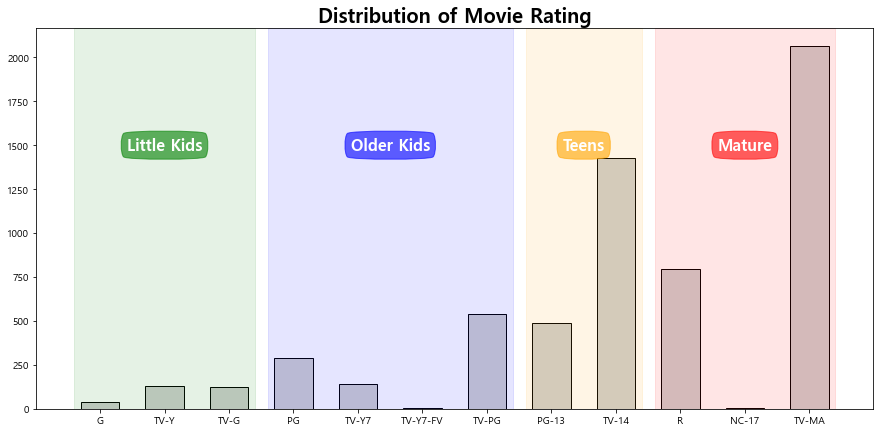

In [28]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

rating_barplot(movie_rating,'Movie', 1500)

## TV Show, Movie

In [25]:
df_tv = data[data["type"] == "TV Show"]
df_movies = data[data["type"] == "Movie"]

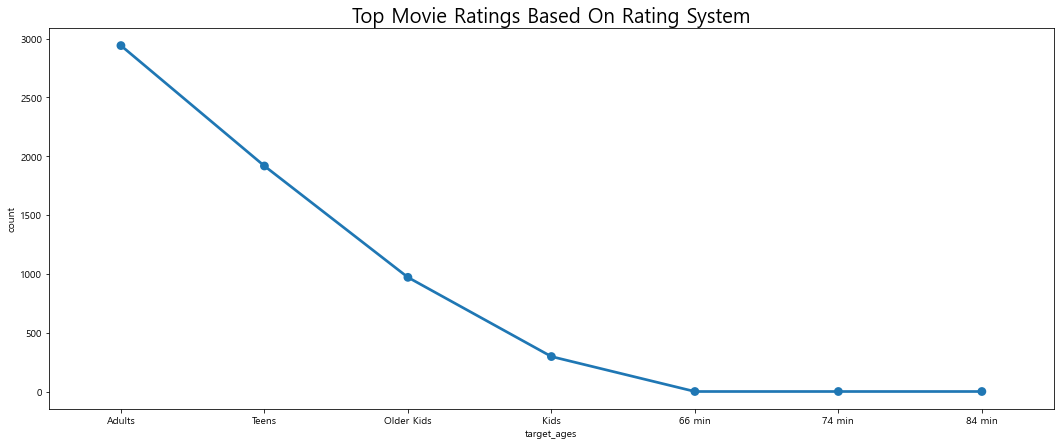

In [26]:
movie_ratings = df_movies.groupby(['target_ages'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='target_ages',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

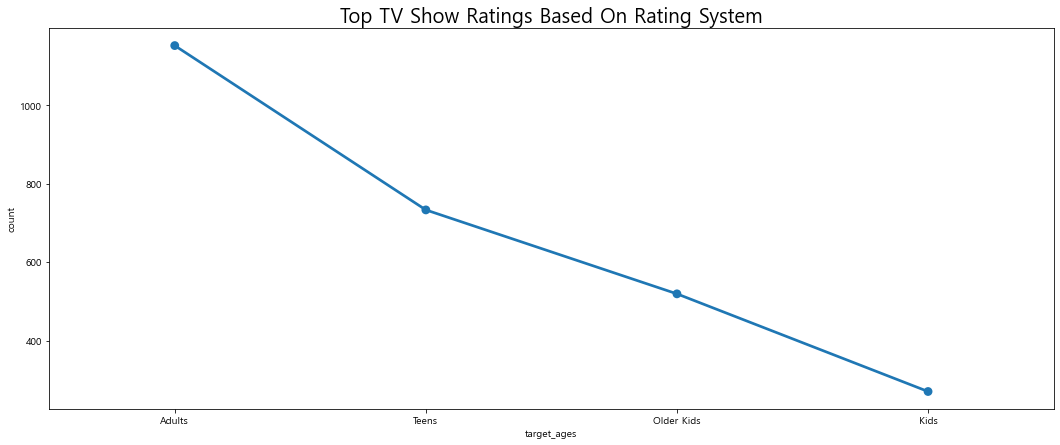

In [27]:
tv_ratings = df_tv.groupby(['target_ages'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='target_ages',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()

# 년, 월, 주별 

In [9]:
data['date_time'] = data['date_added'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))


In [10]:
data.set_index(data['date_time'], inplace=True)


In [11]:
data['CNT'] = 1


In [12]:
dataset_m = data.resample('M')['CNT'].agg(np.sum).fillna(0)
dataset_m

date_time
2008-01-31      1
2008-02-29      1
2008-03-31      0
2008-04-30      0
2008-05-31      0
             ... 
2021-05-31    132
2021-06-30    207
2021-07-31    257
2021-08-31    178
2021-09-30    183
Name: CNT, Length: 165, dtype: int64

In [13]:
dataset_w = data.resample('W-MON')['CNT'].agg(np.sum).fillna(0)
dataset_w

date_time
2008-01-07     1
2008-01-14     0
2008-01-21     0
2008-01-28     0
2008-02-04     1
              ..
2021-08-30    50
2021-09-06    84
2021-09-13    25
2021-09-20    50
2021-09-27    27
Name: CNT, Length: 717, dtype: int64

In [14]:
dataset_Y = data.resample('Y')['CNT'].agg(np.sum).fillna(0)
dataset_Y

date_time
2008-12-31       2
2009-12-31       2
2010-12-31       1
2011-12-31      13
2012-12-31       3
2013-12-31      11
2014-12-31      24
2015-12-31      82
2016-12-31     429
2017-12-31    1188
2018-12-31    1649
2019-12-31    2016
2020-12-31    1879
2021-12-31    1498
Name: CNT, dtype: int64

Text(0, 0.5, 'CNT')

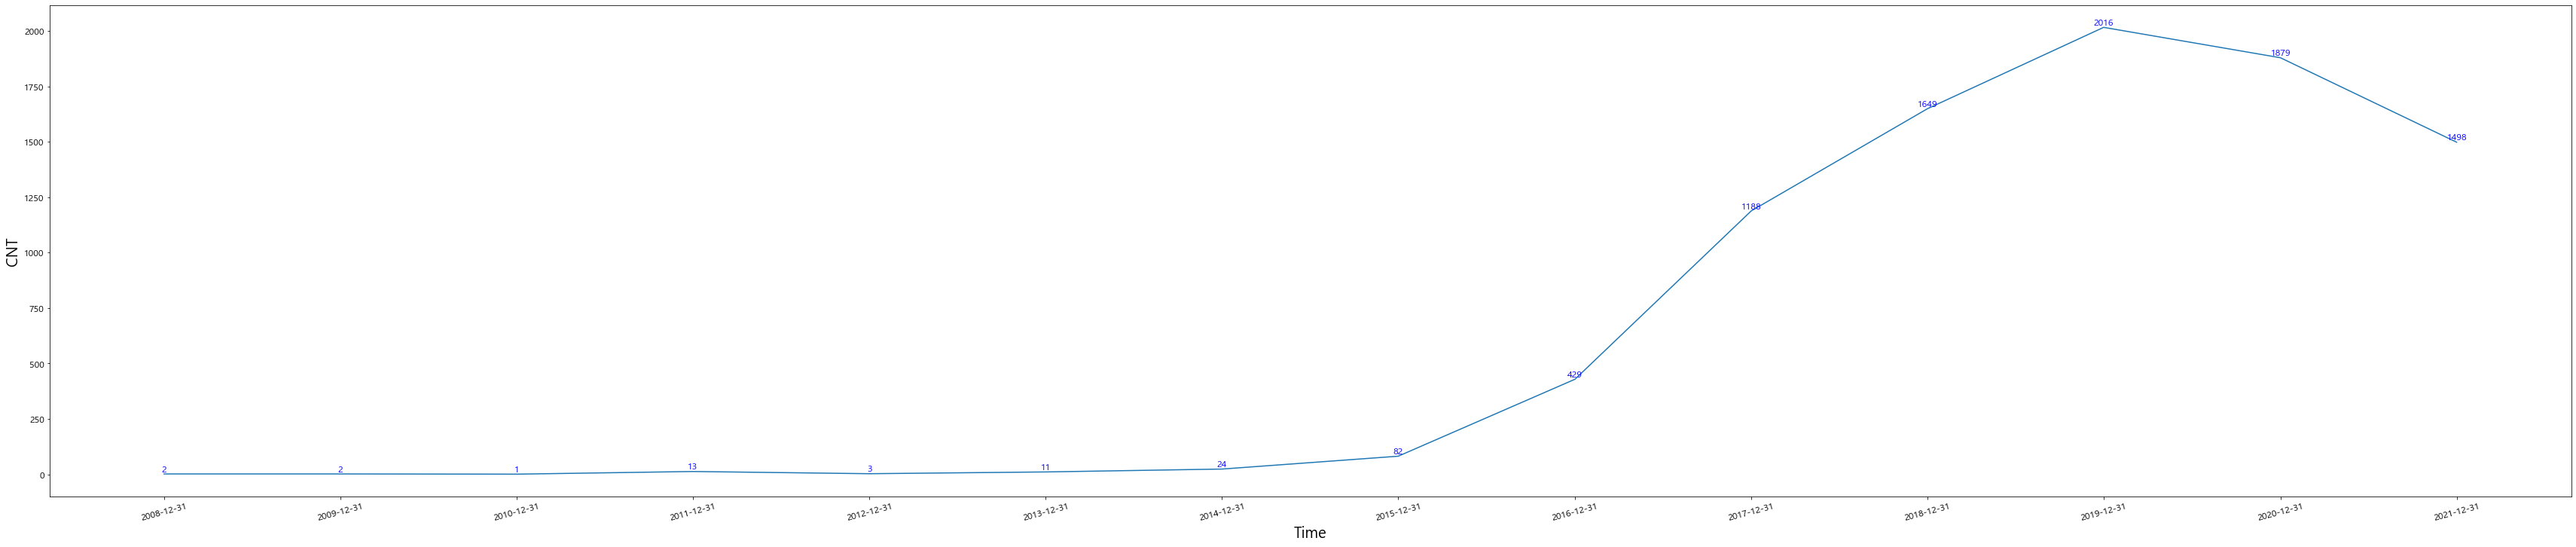

In [15]:
x = dataset_Y.index # x축(시간 정보)
y = dataset_Y # y축 값(데이터 개수)

plt.figure(figsize = (60, 12)) # 전체 figure 크기
plt.plot(dataset_Y) # 그래프 시각화

# 값 시각화
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],
             fontsize = 12, 
             color = 'blue',
             horizontalalignment ='center',
             verticalalignment = 'bottom')
plt.xticks(x, fontsize = 12, rotation = 15) # x축
plt.yticks(fontsize = 12) # y축 눈금
plt.xlabel('Time', fontsize = 20) # x축 이름
plt.ylabel('CNT', fontsize = 20) # y축 이름

## 타입별 등록수

In [ ]:
# main_df['year_added'] = pd.to_numeric(main_df['year_added'])

In [ ]:
# df_content = data['year_added'].value_counts().reset_index().rename(columns = {
#     'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
# df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))


# df_tv1 = df_tv['year_added'].value_counts().reset_index().rename(columns = {
#     'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
# df_tv1['percent'] = df_tv1['count'].apply(lambda x : 100*x/sum(df_tv1['count']))


# df_movies1 = df_movies['year_added'].value_counts().reset_index().rename(columns = {
#     'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
# df_movies1['percent'] = df_movies1['count'].apply(lambda x : 100*x/sum(df_movies1['count']))

# t1 = go.Scatter(x=df_movies1['year_added'], y=df_movies1["count"], name="Movies", marker=dict(color="royalblue"))
# t2 = go.Scatter(x=df_tv1['year_added'], y=df_tv1["count"], name="TV Shows", marker=dict(color="red"))
# t3 = go.Scatter(x=df_content['year_added'], y=df_content["count"], name="Total Contents", marker=dict(color="black"))

# data = [t1, t2, t3]

# layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
# fig = go.Figure(data, layout=layout)
# fig.show()

# 나라별 시청 

In [16]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time,CNT
date_time,,,,,,,,,,,,,,
2021-09-25,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,1
2021-09-24,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,1
2021-09-24,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,1
2021-09-24,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,1
2021-09-24,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,1


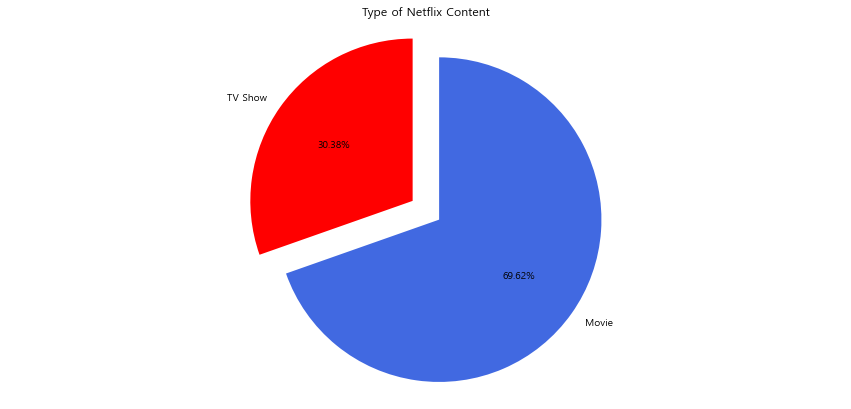

In [17]:
plt.figure(figsize=(15, 7))
labels=['TV Show', 'Movie']
plt.pie(data['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['red','royalblue'], startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

In [18]:
df_tv = data[data["type"] == "TV Show"]
df_movies = data[data["type"] == "Movie"]



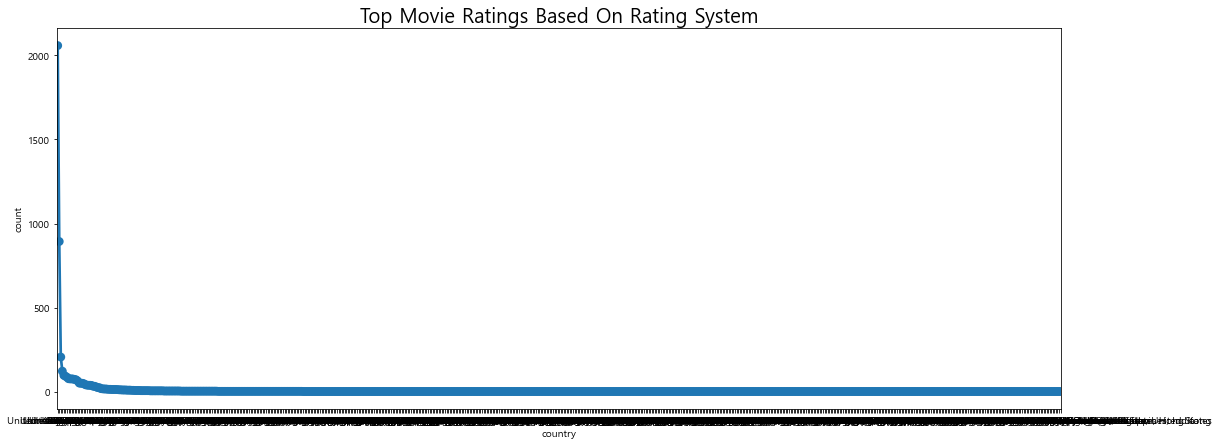

In [19]:
movie_ratings = df_movies.groupby(['country'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='country',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

c:\Users\tiamo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



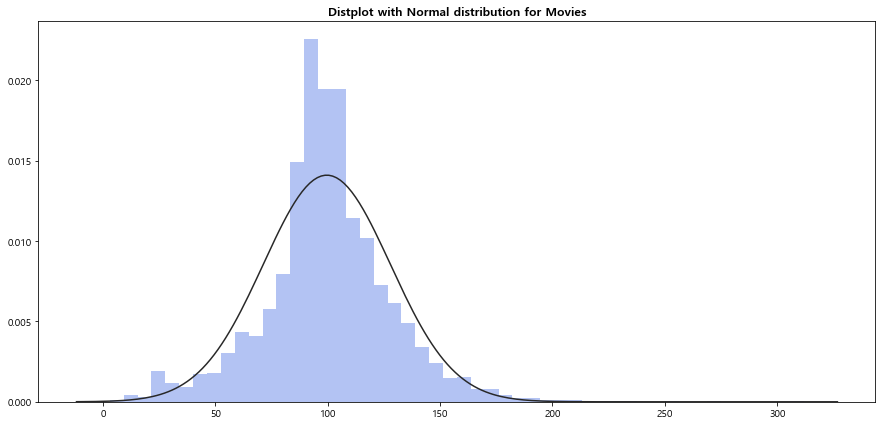

In [42]:
from scipy.stats import norm

plt.figure(figsize=(15,7))
sns.distplot(df_movies['duration'].str.extract('(\d+)'),fit=norm,kde=False, color=['royalblue'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

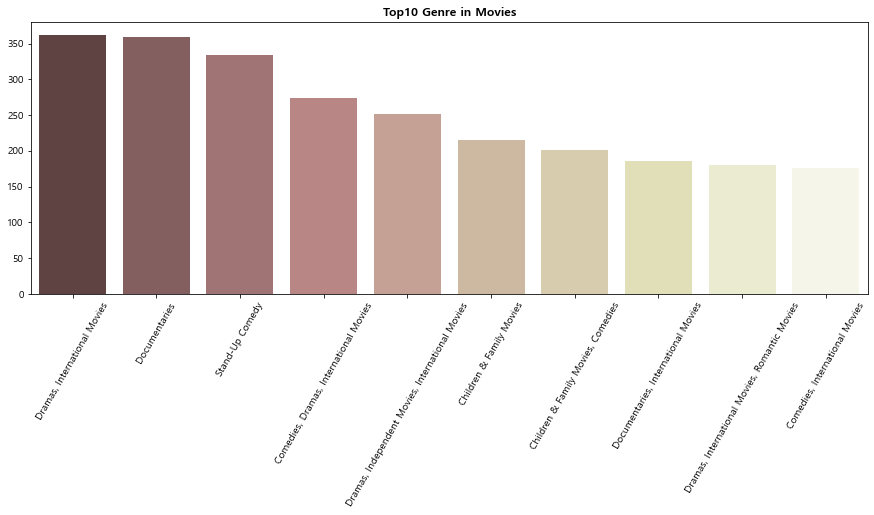

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="pink")
plt.xticks(rotation=60)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

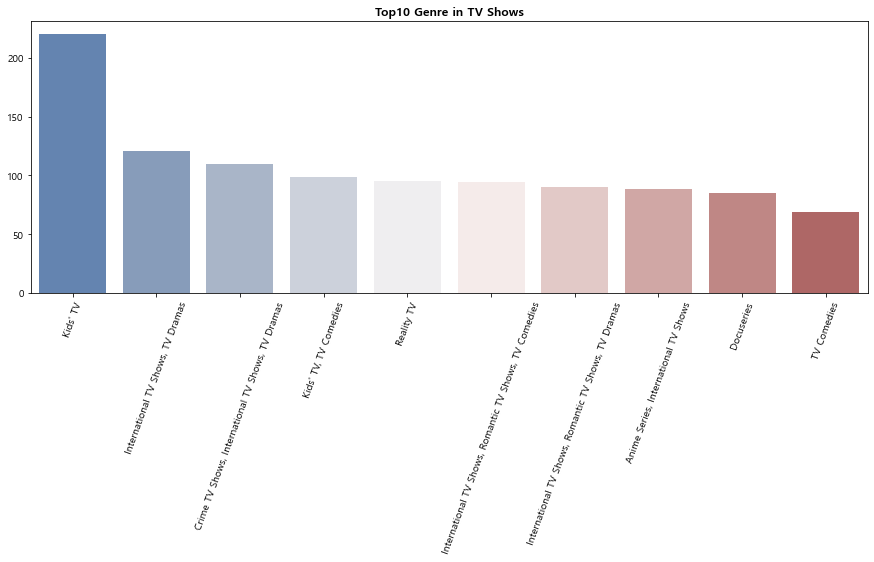

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=70)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

In [49]:
data['country'] = data['country'].fillna(data['country'].mode()[0])

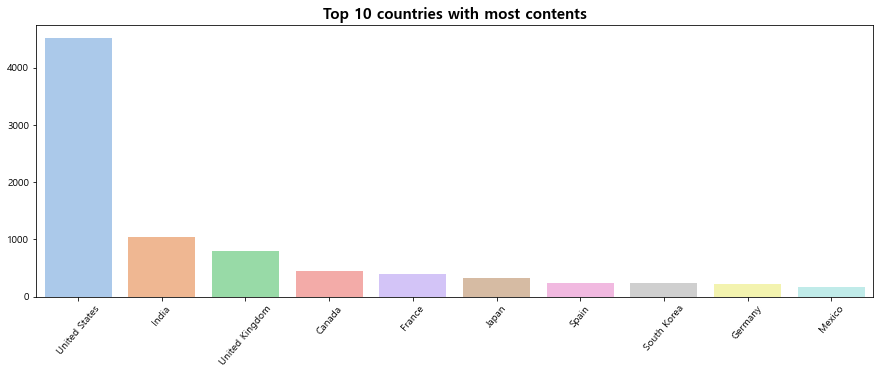

In [62]:
from collections import Counter
country_data = data['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)
top20country = country_count.head(10)
top20country

plt.figure(figsize=(15,5))
sns.barplot(x= top20country.index, y=top20country, palette="pastel")
plt.xticks(rotation=50)
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

In [66]:
top20country

United States     4521
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
dtype: int64

In [75]:
# def sum(i):

#     i = 0

#     for i in top20country(0, 11):
#       sum += i 
#     return


<function __main__.sum(i)>

In [69]:

usa_data = top20country.iloc[0]
ind_data = top20country.iloc[1]
uk_data = top20country.iloc[2]
cad_data = top20country.iloc[3]
fr_data = top20country.iloc[4]
ja_data = top20country.iloc[5]
kor_data = top20country.iloc[6]
ge_data = top20country.iloc[7]
mex_data = top20country.iloc[8]

In [ ]:
import folium

m = folium.Map(location = [35.762887375145795, 84.08313219586536], zoom_start = 3,
               max_bounds = True, 
               min_zoom = 2, min_lat = -84, 
               max_lat = 84, min_lon = -175, max_lon = 187)


# 미국 원 생성
folium.CircleMarker(location = [37.09024, -95.712891], radius = usa_data/70, color = 'magenta', fill_color = 'magenta').add_to(m)

# 인디아 원 생성 

folium.CircleMarker(location = [21.853680694580742, 80.36373959425767], radius = ind_data/20, color = 'red', fill_color = 'red').add_to(m)

# 영국 원 생성 
folium.CircleMarker(location = [51.5073509,-0.1277583], radius = uk_data/20, color = 'blue', fill_color = 'blue').add_to(m)

# 캐나다 원 생성 
folium.CircleMarker(location = [59.06464243652622, -107.16211054505293], radius = cad_data/20, color = 'green', fill_color = 'green').add_to(m)

# 프랑스 원 생성 
folium.CircleMarker(location = [46.1918570913901, 1.9592206644364756], radius = cad_data/20, color = 'green', fill_color = 'green').add_to(m)

# 일본 원 생성 
folium.CircleMarker(location = [35.52622399195315, 137.77491892098806], radius = cad_data/20, color = 'green', fill_color = 'green').add_to(m)

# 한국 원 생성 
folium.CircleMarker(location = [35.762887375145795, 84.08313219586536], radius = cad_data/20, color = 'green', fill_color = 'green').add_to(m)

# 독일 원 생성 
folium.CircleMarker(location = [51.03429300585984, 10.51720414461827], radius = cad_data/20, color = 'green', fill_color = 'green').add_to(m)
m.save
m

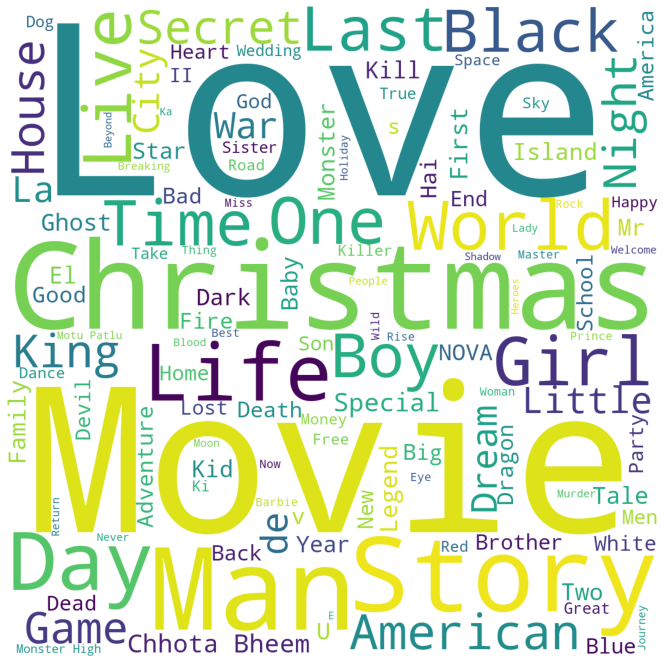

In [51]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movies['title'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

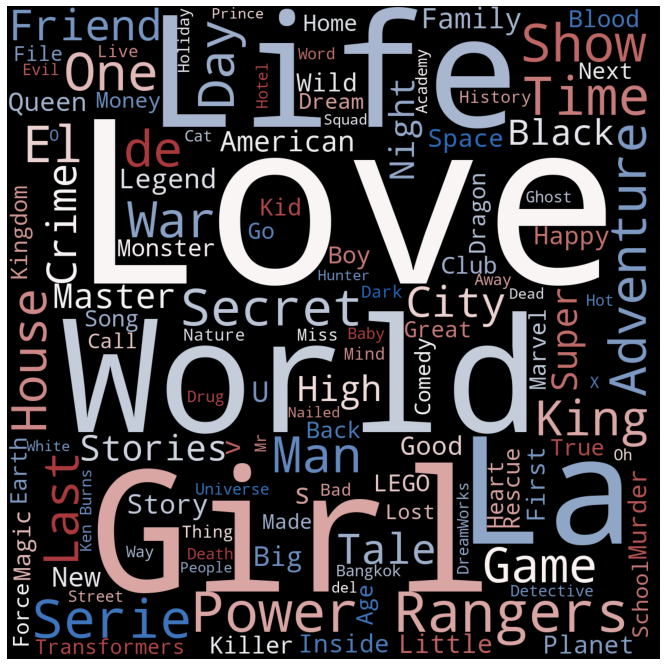

In [52]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_tv['title'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [59]:
import pandas as pd
import pycountry_convert as pc

# country_names = [ "Japan", "China", "Germany" ]
# for n in country_names:
#     print(n, pc.country_name_to_country_alpha2(n))


# Japan JP
# China CN
# Germany DE
# pc.country_alpha2_to_country_name("KR")
# 'Korea, Republic of'
# pc.country_alpha2_to_country_name("KP")
# "Korea, Democratic People's Republic of"

# country_names = [ "Korea, Republic of", "Japan", "Germany" ]


# country_alpha2 = [ pc.country_name_to_country_alpha2(name) for name in country_names ]
# country_alpha2
# ['KR', 'JP', 'DE']
 

# df_countries = data['country']

# country_alpha2 = [ pc.country_name_to_country_alpha2(name) for name in df_countries ]
# country_alpha2


# df_countries = pd.DataFrame( { "name": country_names } )
# df_countries
#                  name
# 0  Korea, Republic of
# 1               Japan
# 2             Germany

# df_countries["alpha2"] = df_countries.apply(pc.country_name_to_country_alpha2)
# df_countries

# >>> df_countries["alpha2"] = df_countries["name"].apply(pc.country_name_to_country_alpha2)
# >>> df_countries
#                  name alpha2
# 0  Korea, Republic of     KR
# 1               Japan     JP
# 2             Germany     DE


# >>> df_countries["continent_code"] = df_countries["alpha2"].apply(pc.country_alpha2_to_continent_code)
# >>> df_countries
#                  name alpha2 continent_code
# 0  Korea, Republic of     KR             AS
# 1               Japan     JP             AS
# 2             Germany     DE             EU



# >>> df_countries["continent"] = df_countries["continent_code"].apply(pc.convert_continent_code_to_continent_name)
# >>> df_countries
#                  name alpha2 continent_code continent
# 0  Korea, Republic of     KR             AS      Asia
# 1               Japan     JP             AS      Asia
# 2             Germany     DE             EU    Europe

KeyError: "Invalid Country Name: 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'"